# Entrega 1 - IIC2433
## Intregantes:
- Fernando Smith
- Borja Márquez de la Plata
- Vicente Lavagnino

## 🌟 Contexto:

**Gokei** es una startup chilena cuyo propósito es simplificar la gestión de la salud para las personas, eliminando la burocracia y los procesos tediosos asociados a trámites como el agendamiento de horas médicas, la compra de medicamentos y, especialmente, la solicitud de reembolsos en isapres y seguros médicos. Gracias a su innovadora plataforma, Gokei ha logrado reducir significativamente los pasos necesarios para estos procesos, mejorando así la experiencia de sus usuarios.

Sin embargo, para seguir mejorando sus servicios y ofrecer una propuesta de **reembolso automático más precisa y confiable**, Gokei necesita procesar los datos existentes y construir un modelo que prediga si un reembolso será aprobado o no. Con esta herramienta, esperan anticipar los resultados de las solicitudes, optimizar el flujo de trabajo y aumentar la eficiencia de la plataforma.

Por ello, recurren a la ayuda de nuestro grupo, donde aplicaremos **conceptos de minería de datos** para procesar la información y desarrollar el modelo predictivo necesario. Esto permitirá a Gokei tomar decisiones más informadas y ofrecer un servicio de reembolso automático con mejores resultados.

## 📁 Conjunto de Datos

Para ello, contamos con información **anonimizada** de reembolsos realizados mediante la plataforma de Gokei, organizada en los siguientes archivos:

#### 🔸 `all-boleta-metadata.json`
Contiene los metadatos de las boletas médicas:
- `amount`: Monto de la boleta.
- `beneficiario`: ID único del beneficiario.
- `doctor_rut`: RUT del médico que emite la boleta.
- `gasto`: ID único del gasto asociado (referencia a `all-gastos.json`).
- `provider_rut`: RUT del prestador o institución.
- `receipt_id`: ID único de la boleta.
- `Creation Date`: Fecha de creación del registro de la boleta.
- `Modified Date`: Fecha de última modificación del registro de la boleta.
- `Slug`: Slug del registro.
- `Creator`: Creador del registro (ej. “App admin”).
- `unique id`: Identificador único del registro de boleta en el sistema.

#### 🔸 `all-gastos.json`
Recoge la información de los gastos médicos realizados:
- `beneficiario`: ID único del beneficiario (referencia a `beneficiarios.json`).
- `boleta_metadata`: Referencia a la boleta médica (puede estar vacío).
- `estado`: Estado actual del gasto (ej. “successful”, “failed” u otros).
- `etapa_rendicion`: Etapa del proceso de rendición del gasto.
- `evento`: Evento o programa al que corresponde el gasto.
- `fecha`: Fecha en que se realizó el gasto.
- `fecha_ultima_revision`: Fecha de última revisión del gasto (puede estar vacío).
- `gestionado_por`: Email de la persona que gestionó el gasto (puede estar vacío).
- `nombre`: Nombre asociado al gasto (puede estar vacío).
- `pagado_el`: Fecha de pago (puede estar vacío).
- `presentado_el`: Fecha de presentación del gasto (puede estar vacío).
- `rendicion_id`: ID de la rendición asociada (puede estar vacío).
- `rinde_isapre`: Indica si rinde por isapre (ej. “sí” o “no”).
- `rinde_seguro`: Indica si rinde por seguro complementario (ej. “sí” o “no”).
- `rinde_seguro2`: Indica si rinde por segundo seguro complementario (ej. “sí” o “no”).
- `subtotal_isapre`: Monto subtotal cubierto por isapre.
- `subtotal_isapre_was_discounted_from_rex`: Indica si el subtotal isapre fue descontado de rex (puede estar vacío).
- `subtotal_seguro`: Monto subtotal cubierto por el primer seguro complementario.
- `subtotal_seguro2`: Monto subtotal cubierto por el segundo seguro complementario (puede estar vacío).
- `tipo`: Tipo de gasto (ej. Fonoaudiología, Examen, Medicamento).
- `total`: Monto total del gasto.
- `usuario`: ID único del usuario que realizó el gasto (referencia a `user.json`).
- `Creation Date`: Fecha de creación del registro del gasto.
- `Modified Date`: Fecha de última modificación del registro del gasto.
- `Slug`: Slug del registro del gasto (puede estar vacío).
- `unique id`: Identificador único del gasto en el sistema.

#### 🔸 `beneficiario.json`
Incluye información detallada de los beneficiarios (usuarios titulares o cargas):
- `aux_initial_age`: Edad inicial registrada al momento del ingreso.
- `es_titular`: Indica si es el titular o carga (puede estar vacío).
- `fecha_de_nacimiento`: Fecha de nacimiento del beneficiario.
- `isapre`: Isapre a la que pertenece el beneficiario.
- `parentezco`: Relación con el titular (ej. Hijo, Cónyuge).
- `seguro`: Seguro complementario del beneficiario (puede estar vacío).
- `seguro2`: Segundo seguro complementario del beneficiario (puede estar vacío).
- `usuario`: ID único del usuario al que está asociado el beneficiario.
- `Creation Date`: Fecha de creación del registro del beneficiario.
- `Modified Date`: Fecha de última modificación del registro del beneficiario.
- `unique id`: Identificador único del beneficiario en el sistema.

#### 🔸 `user.json`
Contiene información general de los usuarios de la plataforma:
- `isapre`: Isapre a la que pertenece el usuario.
- `plan`: Identificador único del plan de salud del usuario.
- `seguro`: Seguro complementario del usuario (puede estar vacío).
- `seguro2`: Segundo seguro complementario del usuario (puede estar vacío).
- `subscription_date`: Fecha de suscripción (puede estar vacío).
- `Creation Date`: Fecha de creación del registro del usuario.
- `Modified Date`: Fecha de última modificación del registro del usuario.
- `unique id`: Identificador único del usuario en la plataforma.

--- 
## 🚀 Desafío 
A partir de estos datos, aplicaremos técnicas de minería de datos para:
- Analizar patrones.
- Identificar variables relevantes.
- Construir un modelo predictivo que permita anticipar la aprobación de los reembolsos y mejorar la propuesta de **reembolso automático**.

<img src="image-20250602-162708.png" width="" align="" />

### Preprocesamiento

Para poder tratar los datos de una manera adecuada al ejercicio, lo primero que haremos será crear un `.csv` único con todos los datos necesarios, haciendo que cada gasto sea una fila del dataset y cada columna una información relevante para el ejercicio.

#### 📊 Lógica de Selección de Campos y Estructura Final del CSV

El objetivo es crear un archivo CSV consolidado que contenga toda la información **relevante** y **necesaria** de los gastos, integrando datos de los cuatro archivos JSON disponibles. A continuación, se explica la **lógica utilizada para determinar qué campos se incluyen** y cómo se construye el CSV final.

#### 🔎 Criterios de inclusión de registros

- Se incluyen **solo los gastos** cuyo campo `estado` en `all-gastos.json` sea **"successful"** o **"failed"**.
- Se omiten todos los registros de gasto que tengan otro valor en el campo `estado`.


#### 🔗 Integración de datos y "fallbacks"

Para cada gasto, se recopilan los siguientes campos:

1️⃣ **Datos básicos del gasto** (de `all-gastos.json`):
- `unique_id`, `beneficiario`, `estado`, `etapa_rendicion`, `evento`, `rinde_isapre`, `rinde_seguro`, `rinde_seguro2`, `subtotal_isapre`, `subtotal_seguro`, `subtotal_seguro2`, `tipo`, `total`, `usuario`.
- Fechas de creación y modificación (`created_at`, `modified_at`).

2️⃣ **Fecha de creación final**:
- Se prioriza la fecha de creación de la boleta (`Creation Date` de `all-boleta-metadata.json`) si existe para ese gasto.
- Si no existe boleta asociada, se utiliza la fecha de creación del gasto (`Creation Date` de `all-gastos.json`).

3️⃣ **Datos de la boleta** (de `all-boleta-metadata.json`):
- `doctor_rut`, `provider_rut`.
- Se obtienen **solo si existe una boleta asociada** con el gasto (relación por `gasto` en boleta con `unique id` en gasto).

4️⃣ **Información del beneficiario** (de `beneficiario.json`) con fallback en `user.json`:
- `isapre`: Primero se toma el de `beneficiario`, y si no existe se toma el de `user`.
- `seguro` y `seguro2`: Primero se toman del `beneficiario`. Si no existen y **`rinde_seguro` es "sí"**, se usan los valores de `user`.
- Si no existe ni en `beneficiario` ni en `user`, se deja vacío.

5️⃣ **Datos de usuario** (de `user.json`):
- Se utilizan como **fuente de fallback** para `isapre`, `seguro` y `seguro2`.


#### 📄 Estructura final del CSV

El CSV final **`gastos_filtrados.csv`** contiene las siguientes columnas:

| Campo              | Descripción                                                                                          |
|--------------------|------------------------------------------------------------------------------------------------------|
| `unique_id`        | Identificador único del gasto.                                                                       |
| `beneficiario`     | ID único del beneficiario.                                                                           |
| `estado`           | Estado del gasto (`successful` o `failed`).                                                          |
| `etapa_rendicion`  | Etapa del proceso de rendición del gasto.                                                            |
| `evento`           | Evento o programa al que corresponde el gasto.                                                       |
| `created_at`       | Fecha de creación (prioridad a boleta si existe, si no la del gasto).                                |
| `modified_at`      | Fecha de última modificación del gasto.                                                              |
| `rinde_isapre`     | Indicador de cobertura por isapre.                                                                   |
| `rinde_seguro`     | Indicador de cobertura por seguro complementario.                                                    |
| `rinde_seguro2`    | Indicador de cobertura por segundo seguro complementario.                                            |
| `subtotal_isapre`  | Monto subtotal cubierto por isapre.                                                                  |
| `subtotal_seguro`  | Monto subtotal cubierto por el primer seguro complementario.                                          |
| `subtotal_seguro2` | Monto subtotal cubierto por el segundo seguro complementario.                                         |
| `tipo`             | Tipo de gasto (ej. Fonoaudiología, Medicamento).                                                     |
| `total`            | Monto total del gasto.                                                                               |
| `usuario`          | ID único del usuario que realizó el gasto.                                                           |
| `doctor_rut`       | RUT del médico que emite la boleta (solo si existe boleta asociada).                                  |
| `provider_rut`     | RUT del prestador o institución (solo si existe boleta asociada).                                     |
| `isapre`           | Isapre del beneficiario (o del usuario si no existe en beneficiario).                                 |
| `seguro`           | Primer seguro complementario (del beneficiario o del usuario si `rinde_seguro` es "sí").              |
| `seguro2`          | Segundo seguro complementario (del beneficiario o del usuario si `rinde_seguro` es "sí").             |


#### 🔍 Consideraciones adicionales

- **Campos vacíos**: Si algún campo no existe en los archivos originales, se completa con una cadena vacía `""` en el CSV.
- **Relaciones clave**:
  - Boleta ↔ Gasto: `gasto` en boleta == `unique id` en gasto.
  - Gasto ↔ Beneficiario: `beneficiario` en gasto == `unique id` en beneficiario.
  - Gasto ↔ Usuario: `usuario` en gasto == `unique id` en usuario.


✅ Con esta lógica, el CSV resultante **consolida todos los datos relevantes** y permite análisis posteriores como validaciones, visualizaciones o integración con otras herramientas de análisis.  

In [10]:
import json
import csv

# Carga de datos
with open('all-boleta-metadata.json') as f:
    boletas_metadata = json.load(f)

with open('all-gastos.json') as f:
    gastos = json.load(f)

with open('beneficiarios.json') as f:
    beneficiarios = json.load(f)

with open('users.json') as f:
    usuarios = json.load(f)

# Índices rápidos
boleta_by_gasto = {b['gasto']: b for b in boletas_metadata}
beneficiario_by_id = {b['unique id']: b for b in beneficiarios}
usuario_by_id = {u['unique id']: u for u in usuarios}

# Archivo de salida
with open('gastos_filtrados.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = [
        'unique_id', 'beneficiario', 'estado', 'etapa_rendicion', 'evento',
        'created_at', 'modified_at', 'rinde_isapre', 'rinde_seguro', 'rinde_seguro2',
        'subtotal_isapre', 'subtotal_seguro', 'subtotal_seguro2', 'tipo', 'total',
        'usuario', 'doctor_rut', 'provider_rut', 'isapre', 'seguro', 'seguro2'
    ]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    for gasto in gastos:
        estado = gasto.get('estado', '').lower()
        if estado not in ['successful', 'failed']:
            continue  # Solo estados 'successful' o 'failed'

        # Buscar boleta asociada
        boleta = boleta_by_gasto.get(gasto['unique id'], {})

        # Buscar beneficiario y usuario asociados
        beneficiario = beneficiario_by_id.get(gasto.get('beneficiario', ''), {})
        usuario = usuario_by_id.get(gasto.get('usuario', ''), {})

        # created_at: prioridad boleta_metadata
        created_at = boleta.get('Creation Date') or gasto.get('Creation Date', '')

        # modified_at
        modified_at = gasto.get('Modified Date', '')

        # Fallbacks para isapre
        isapre = beneficiario.get('isapre', '') or usuario.get('isapre', '')

        # Fallbacks para seguro y seguro2 (si rinde_seguro == 'sí')
        rinde_seguro = gasto.get('rinde_seguro', '')
        seguro = beneficiario.get('seguro', '') or (usuario.get('seguro', '') if rinde_seguro == 'sí' else '')
        seguro2 = beneficiario.get('seguro2', '') or (usuario.get('seguro2', '') if rinde_seguro == 'sí' else '')

        # doctor_rut y provider_rut
        doctor_rut = boleta.get('doctor_rut', '')
        provider_rut = boleta.get('provider_rut', '')

        # Fila completa
        row = {
            'unique_id': gasto.get('unique id', ''),
            'beneficiario': gasto.get('beneficiario', ''),
            'estado': gasto.get('estado', ''),
            'etapa_rendicion': gasto.get('etapa_rendicion', ''),
            'evento': gasto.get('evento', ''),
            'created_at': created_at,
            'modified_at': modified_at,
            'rinde_isapre': gasto.get('rinde_isapre', ''),
            'rinde_seguro': rinde_seguro,
            'rinde_seguro2': gasto.get('rinde_seguro2', ''),
            'subtotal_isapre': gasto.get('subtotal_isapre', ''),
            'subtotal_seguro': gasto.get('subtotal_seguro', ''),
            'subtotal_seguro2': gasto.get('subtotal_seguro2', ''),
            'tipo': gasto.get('tipo', ''),
            'total': gasto.get('total', ''),
            'usuario': gasto.get('usuario', ''),
            'doctor_rut': doctor_rut,
            'provider_rut': provider_rut,
            'isapre': isapre,
            'seguro': seguro,
            'seguro2': seguro2
        }

        # Escribir la fila en el CSV
        writer.writerow(row)

print("✅ CSV creado correctamente: gastos_filtrados.csv")

✅ CSV creado correctamente: gastos_filtrados.csv


# Exploración del Dataset
En esta sección se estudiará las variables del dataset: sus tipos, valores nulos, correlaciones y significancia.
Primero, cargamos el dataset

In [13]:
import pandas as pd
# carga dataset
df = pd.read_csv("gastos_filtrados.csv")
df.columns = df.columns.str.strip()  # <-- This removes leading/trailing spaces
df.head()

,unique_id,beneficiario,estado,etapa_rendicion,evento,created_at,modified_at,rinde_isapre,rinde_seguro,rinde_seguro2,...,subtotal_seguro,subtotal_seguro2,tipo,total,usuario,doctor_rut,provider_rut,isapre,seguro,seguro2
0,1685576896153x277002550026698750,1684331029314x112075451000422400,successful,NaN,Pulmonía,"May 31, 2023 7:48 pm","Aug 28, 2023 4:31 pm",NaN,NaN,NaN,...,NaN,NaN,Hora Médica,100000,1684273949865x908247360857650700,NaN,NaN,Colmena,NaN,NaN
1,1688160609917x379674504977186800,1684331333933x333867060411760640,successful,NaN,Pulmonía,"Jun 30, 2023 5:30 pm","Jun 30, 2023 6:09 pm",NaN,NaN,NaN,...,NaN,NaN,Proced. Hospitalización,58000,1684273949865x908247360857650700,NaN,NaN,Colmena,NaN,NaN
2,1689263474376x372992004271636500,1686611131993x414139617401896960,successful,NaN,Torcí tobillo en básquet,"Jul 13, 2023 11:51 am","Aug 31, 2023 9:02 pm",NaN,NaN,NaN,...,NaN,NaN,Kinesiología,38500,1686611076401x751333929015058900,NaN,NaN,Colmena,NaN,NaN
3,1689694599946x470522542660255740,1684331029314x112075451000422400,successful,SEGURO,Pulmonía,"Jul 18, 2023 11:36 am","Jan 23, 2025 5:13 pm",sí,sí,NaN,...,NaN,NaN,Examen / Imágenes,50000,1684273949865x908247360857650700,NaN,NaN,Colmena,Accihealth,1728066121215x246052528677507040
4,1689791732914x573202961059020800,1686611131993x414139617401896960,successful,NaN,Torcí tobillo en básquet,"Jul 19, 2023 2:35 pm","Aug 31, 2023 9:02 pm",NaN,NaN,NaN,...,NaN,NaN,Kinesiología,38500,1686611076401x751333929015058900,NaN,NaN,Colmena,NaN,NaN


Ahora, revisamos las variables y valores nulos

In [16]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8666 entries, 0 to 8665
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   unique_id         8666 non-null   object 
 1   beneficiario      8639 non-null   object 
 2   estado            8666 non-null   object 
 3   etapa_rendicion   6681 non-null   object 
 4   evento            1478 non-null   object 
 5   created_at        8666 non-null   object 
 6   modified_at       8666 non-null   object 
 7   rinde_isapre      8648 non-null   object 
 8   rinde_seguro      8648 non-null   object 
 9   rinde_seguro2     8275 non-null   object 
 10  subtotal_isapre   7957 non-null   float64
 11  subtotal_seguro   7452 non-null   object 
 12  subtotal_seguro2  5075 non-null   float64
 13  tipo              8537 non-null   object 
 14  total             8666 non-null   int64  
 15  usuario           8664 non-null   object 
 16  doctor_rut        1561 non-null   object 


Tenemos que cambiar los tipos de las variables de object a su tipo

In [19]:
df['estado'] = df['estado'].astype('string')
df['etapa_rendicion'] = df['etapa_rendicion'].astype('string')
df['evento'] = df['evento'].astype('string')
df['created_at'] = pd.to_datetime(df['created_at'], format='%b %d, %Y %I:%M %p')
df['modified_at'] = pd.to_datetime(df['modified_at'], format='%b %d, %Y %I:%M %p')
df['rinde_isapre'] = df['rinde_isapre'].astype('string')
df['rinde_seguro'] = df['rinde_seguro'].astype('string')
df['rinde_seguro2'] = df['rinde_seguro2'].astype('string')
df['subtotal_seguro'] = df['subtotal_seguro'].str.replace(',', '.', regex=False).astype(float)
df['tipo'] = df['tipo'].astype('string')
df['rinde_seguro2'] = df['rinde_seguro2'].astype('string')
df['doctor_rut'] = df['doctor_rut'].astype('string')
df['provider_rut'] = df['provider_rut'].astype('string')
df['isapre'] = df['isapre'].astype('string')
df['seguro'] = df['seguro'].astype('string')
df['seguro2'] = df['seguro2'].astype('string')

In [22]:
bool_map = {
    'sí': True,
    'si': True,
    'verdadero': True,
    'true': True,
    '1': True,
    'no': False,
    'falso': False,
    'false': False,
    '0': False
}
succesful_map = {
    'successful': True,
    'failed': False
}
df['rinde_isapre'] = df['rinde_isapre'].str.lower().map(bool_map).astype(bool)
df['rinde_seguro'] = df['rinde_seguro'].str.lower().map(bool_map).astype(bool)
df['rinde_seguro2'] = df['rinde_seguro2'].str.lower().map(bool_map).astype(bool)
df = df.rename(columns={'estado': 'is_succesful'})
df['is_succesful'] = df['is_succesful'].str.lower().map(succesful_map).astype(bool)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8666 entries, 0 to 8665
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   unique_id         8666 non-null   object        
 1   beneficiario      8639 non-null   object        
 2   is_succesful      8666 non-null   bool          
 3   etapa_rendicion   6681 non-null   string        
 4   evento            1478 non-null   string        
 5   created_at        8666 non-null   datetime64[ns]
 6   modified_at       8666 non-null   datetime64[ns]
 7   rinde_isapre      8666 non-null   bool          
 8   rinde_seguro      8666 non-null   bool          
 9   rinde_seguro2     8666 non-null   bool          
 10  subtotal_isapre   7957 non-null   float64       
 11  subtotal_seguro   7452 non-null   float64       
 12  subtotal_seguro2  5075 non-null   float64       
 13  tipo              8537 non-null   string        
 14  total             8666 n

In [25]:
df.isnull().sum()

unique_id              0
beneficiario          27
is_succesful           0
etapa_rendicion     1985
evento              7188
created_at             0
modified_at            0
rinde_isapre           0
rinde_seguro           0
rinde_seguro2          0
subtotal_isapre      709
subtotal_seguro     1214
subtotal_seguro2    3591
tipo                 129
total                  0
usuario                2
doctor_rut          7105
provider_rut        7105
isapre                38
seguro              1408
seguro2             7189
dtype: int64

Podemos notar que hay algunas variables con muchas entradas nulas, como:
- `evento`: 7188
- `subtotal_seguro2`: 3591
- `seguro2`: 7189
- `doctor_rut` y `provider_rut`: 7105

Tener tantos valores nulos puede ser un problema, considerando que tenemos 8666 entradas no podemos llegar y simplemente eliminar los nulos ya que perderíamos muchas entradas. Por lo tanto se van a analizar estas variables y estudiar que significan para ver si aportan al estudio planteado.
Primero, que `subtotal_seguro2` y `seguro2` tengan muchos valores nulos no es sorprendente, ya que son pocas las personas que ademas de isapre tienen un seguro complementario, y aún menos las que tienen dos. En efectos de este proyecto se proponen dos alternativas para manejar esta situación: no utilizar las variables de seguros complementarios, o crear tres datasets: uno de isapres, otro de personas con un seguro, y otro de personas con dos.
Segundo, respecto a `evento`, es un campo de texto libre que describe la razón de porqué se fue al doctor. No se plantea hacer análisis de lenguaje natural en este estudio por lo que no se incluirá la variable.
Finalmente, `doctor_rut` y `provider_rut` son información adicional de la consulta. Para ver si podrían aportar información a la busqueda de patrones se va a revisar cuántos valores repetidos hay.

In [28]:

df['doctor_rut'].value_counts()

doctor_rut
76031071-9      18
76378831-8      18
18396016-4      16
77163755-8      16
13332692-8      16
                ..
14045127-4       1
15366023-9       1
17.962.141-K     1
7733239-1        1
10733645-1       1
Name: count, Length: 730, dtype: Int64

Vemos que a lo más se repite 18 veces el mismo doctor, lo cual es muy poco (considerando que tenemos 8666 entradas) para poder encontrar patrones con ellos. Por lo tanto, estas variables tampoco se usarán.
A partir de este análisis, se producen los datasets

In [31]:
'''
unique_id              0
beneficiario          27
estado                 0
etapa_rendicion     1985
evento              7188
created_at             0
modified_at            0
rinde_isapre          18
rinde_seguro          18
rinde_seguro2        391
subtotal_isapre      709
subtotal_seguro     1214
subtotal_seguro2    3591
tipo                 129
total                  0
usuario                2
doctor_rut          7105
provider_rut        7105
isapre                38
seguro              1408
seguro2             7189
'''
df_solo_isapre = df.drop(['unique_id','etapa_rendicion', 'evento', 'doctor_rut', 'provider_rut', 'rinde_seguro', 'rinde_seguro2', 'subtotal_seguro', 'subtotal_seguro2', 'seguro', 'seguro2'], axis=1)
df_con_seguro = df.drop(['unique_id','etapa_rendicion','evento', 'doctor_rut', 'provider_rut', 'rinde_seguro2', 'subtotal_seguro2', 'seguro2'], axis=1)
df_con_seguro2 = df.drop(['unique_id','etapa_rendicion','evento', 'doctor_rut', 'provider_rut'], axis=1)

In [34]:
df_solo_isapre = df_solo_isapre.dropna()
df_solo_isapre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7797 entries, 3 to 8665
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   beneficiario     7797 non-null   object        
 1   is_succesful     7797 non-null   bool          
 2   created_at       7797 non-null   datetime64[ns]
 3   modified_at      7797 non-null   datetime64[ns]
 4   rinde_isapre     7797 non-null   bool          
 5   subtotal_isapre  7797 non-null   float64       
 6   tipo             7797 non-null   string        
 7   total            7797 non-null   int64         
 8   usuario          7797 non-null   object        
 9   isapre           7797 non-null   string        
dtypes: bool(2), datetime64[ns](2), float64(1), int64(1), object(2), string(2)
memory usage: 563.5+ KB


In [37]:
df_con_seguro = df_con_seguro.dropna()
df_con_seguro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6119 entries, 14 to 8655
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   beneficiario     6119 non-null   object        
 1   is_succesful     6119 non-null   bool          
 2   created_at       6119 non-null   datetime64[ns]
 3   modified_at      6119 non-null   datetime64[ns]
 4   rinde_isapre     6119 non-null   bool          
 5   rinde_seguro     6119 non-null   bool          
 6   subtotal_isapre  6119 non-null   float64       
 7   subtotal_seguro  6119 non-null   float64       
 8   tipo             6119 non-null   string        
 9   total            6119 non-null   int64         
 10  usuario          6119 non-null   object        
 11  isapre           6119 non-null   string        
 12  seguro           6119 non-null   string        
dtypes: bool(3), datetime64[ns](2), float64(2), int64(1), object(2), string(3)
memory usage: 543.8+ KB

In [40]:

df_con_seguro2 = df_con_seguro2.dropna()
df_con_seguro2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824 entries, 172 to 8527
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   beneficiario      824 non-null    object        
 1   is_succesful      824 non-null    bool          
 2   created_at        824 non-null    datetime64[ns]
 3   modified_at       824 non-null    datetime64[ns]
 4   rinde_isapre      824 non-null    bool          
 5   rinde_seguro      824 non-null    bool          
 6   rinde_seguro2     824 non-null    bool          
 7   subtotal_isapre   824 non-null    float64       
 8   subtotal_seguro   824 non-null    float64       
 9   subtotal_seguro2  824 non-null    float64       
 10  tipo              824 non-null    string        
 11  total             824 non-null    int64         
 12  usuario           824 non-null    object        
 13  isapre            824 non-null    string        
 14  seguro            824 non-nu

## Análisis dataset solo isapre

Para una primera aproximación haremos todo el ejercicio de este proyecto exclusivamente con los datos previos a la solicitud de seguro, es decir solo isapre.

Estudiaremos ahora el dataset sin seguros y veremos las correlaciones entre las variables, para luego analizar las dimensiones.

In [43]:
# feature engineer (tentativo), crear variable de duracion.
df_solo_isapre['duration'] = (df_solo_isapre['modified_at'] - df_solo_isapre['created_at']).dt.days
df_solo_isapre = df_solo_isapre.drop(['created_at', 'modified_at'], axis=1)
df_solo_isapre.head()

,beneficiario,is_succesful,rinde_isapre,subtotal_isapre,tipo,total,usuario,isapre,duration
3,1684331029314x112075451000422400,True,True,69.0,Examen / Imágenes,50000,1684273949865x908247360857650700,Colmena,555
14,1693441812377x732871233830912000,True,True,235045.0,Examen / Imágenes,335779,1693441775819x115841968545658430,Colmena,83
16,1693097255606x874432380654846000,True,True,135000.0,Psicología,150000,1693097162085x708695979192528000,Cruz Blanca,80
17,1693064777729x437794215547895800,True,True,21654.0,Hora Médica,40000,1693064675409x276259617059070530,Masvida,80
18,1693873985958x146271450179829760,True,True,27362.0,Otro,131000,1693441775819x115841968545658430,Colmena,79


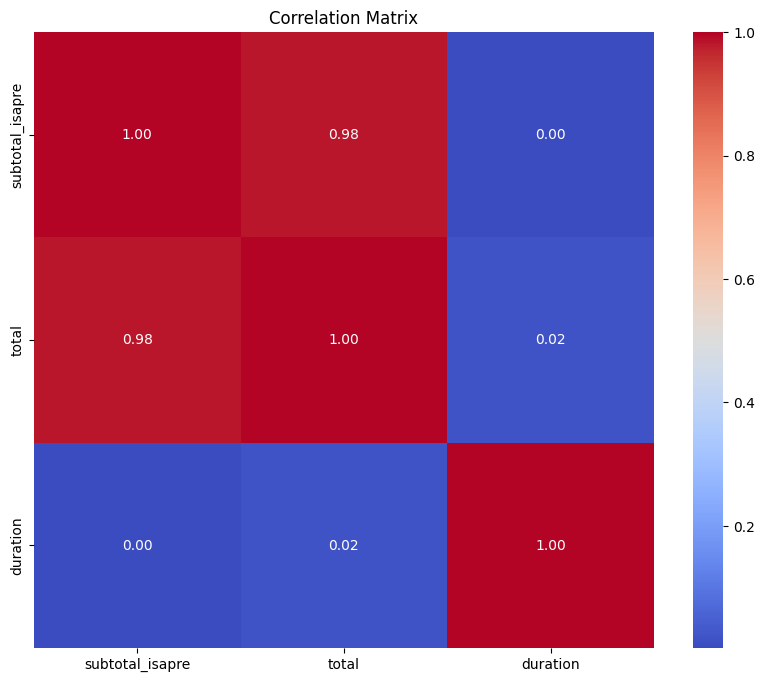

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_solo_isapre.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

# Detección de Outliers

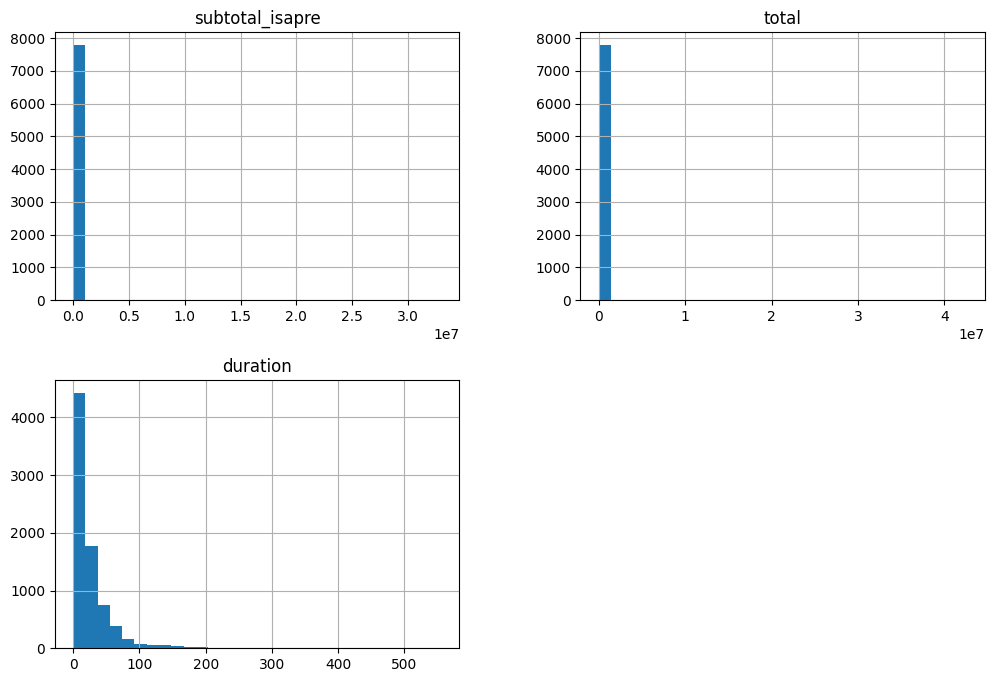

In [49]:
import matplotlib.pyplot as plt
df_solo_isapre.hist(bins=30, figsize=(12,8))
plt.show()

Resultados

In [52]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.1, random_state=42)  # set contamination as needed
outliers = iso.fit_predict(df_solo_isapre.select_dtypes(include='number'))
df_outliers = df_solo_isapre[outliers == -1]
df_outliers.info()

X does not have valid feature names, but IsolationForest was fitted with feature names
<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 3 to 8655
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   beneficiario     780 non-null    object 
 1   is_succesful     780 non-null    bool   
 2   rinde_isapre     780 non-null    bool   
 3   subtotal_isapre  780 non-null    float64
 4   tipo             780 non-null    string 
 5   total            780 non-null    int64  
 6   usuario          780 non-null    object 
 7   isapre           780 non-null    string 
 8   duration         780 non-null    int64  
dtypes: bool(2), float64(1), int64(2), object(2), string(2)
memory usage: 50.3+ KB


In [55]:
# Eliminar datos outlier
df_sin_outliers = df_solo_isapre[outliers != -1]
df_sin_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7017 entries, 17 to 8665
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   beneficiario     7017 non-null   object 
 1   is_succesful     7017 non-null   bool   
 2   rinde_isapre     7017 non-null   bool   
 3   subtotal_isapre  7017 non-null   float64
 4   tipo             7017 non-null   string 
 5   total            7017 non-null   int64  
 6   usuario          7017 non-null   object 
 7   isapre           7017 non-null   string 
 8   duration         7017 non-null   int64  
dtypes: bool(2), float64(1), int64(2), object(2), string(2)
memory usage: 452.3+ KB


In [58]:
df_outliers


,beneficiario,is_succesful,rinde_isapre,subtotal_isapre,tipo,total,usuario,isapre,duration
3,1684331029314x112075451000422400,True,True,69.0,Examen / Imágenes,50000,1684273949865x908247360857650700,Colmena,555
14,1693441812377x732871233830912000,True,True,235045.0,Examen / Imágenes,335779,1693441775819x115841968545658430,Colmena,83
16,1693097255606x874432380654846000,True,True,135000.0,Psicología,150000,1693097162085x708695979192528000,Cruz Blanca,80
27,1687812534363x997883940937400300,False,True,89472.0,Medicamentos,111841,1687794708590x811400224735179200,Colmena,150
42,1710171801609x768121971028251600,True,True,5810.0,Psicología,50000,1708554243167x128932343290439230,Consalud,123
...,...,...,...,...,...,...,...,...,...
8447,1732649981004x174954145493204640,True,True,154000.0,Psicología,220000,1732649978220x294825016807779100,Colmena,12
8514,1715110652185x806205362707628000,True,False,478216.0,Examen / Imágenes,519800,1715110507351x444754410233869200,Cruz Blanca,0
8597,1732649980970x354482082667777300,True,False,1163401.0,Examen / Imágenes,2033952,1732649978220x294825016807779100,Colmena,6
8638,1747755776821x850346442837504300,True,False,154686.0,Otro,652008,1747755773745x320850002662944200,Colmena,3


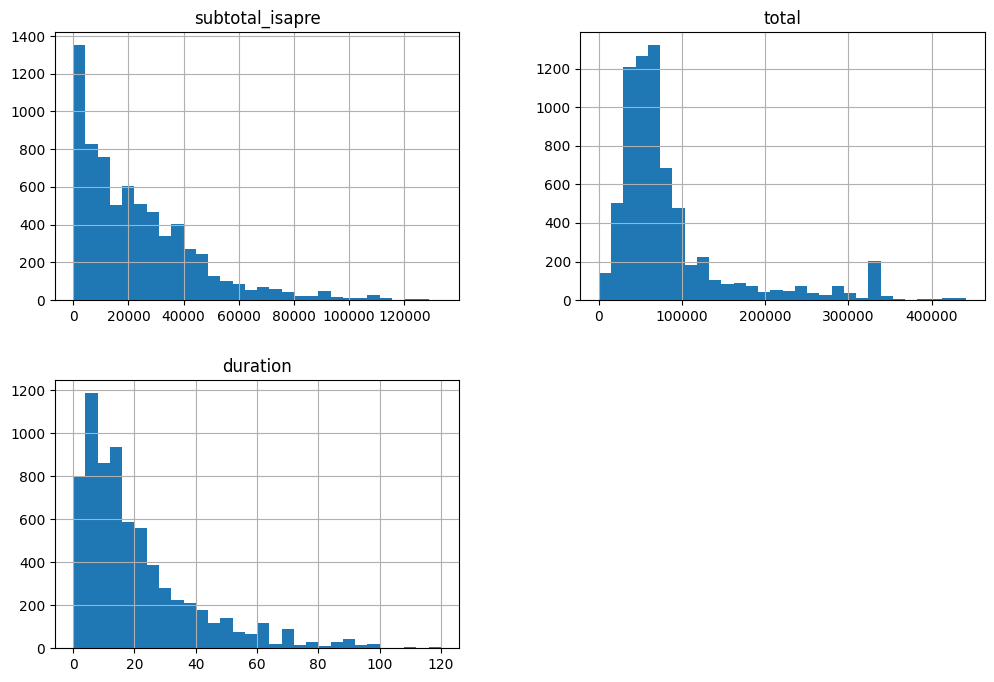

In [61]:

df_sin_outliers.hist(bins=30, figsize=(12,8))
plt.show()

# Normalización de variables
Procedemos ahora a normalizar las variables usando un Stadard scaler y onehot encoding para categóricas.

In [64]:
from sklearn.preprocessing import StandardScaler

# 1. Encode categorical columns using one-hot encoding
cat_cols = df_sin_outliers.select_dtypes(include='string').columns
df_solo_isapre_encoded = pd.get_dummies(df_sin_outliers, columns=cat_cols, drop_first=True)  # drop_first to avoid multicollinearity

# 2. Scale numeric columns (including the encoded booleans)
numeric_cols = df_solo_isapre_encoded.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df_solo_isapre_encoded[numeric_cols] = scaler.fit_transform(df_solo_isapre_encoded[numeric_cols])

df_solo_isapre_encoded

,beneficiario,is_succesful,rinde_isapre,subtotal_isapre,total,usuario,duration,tipo_Examen / Imágenes,tipo_Fonoaudiología,tipo_Hora Médica,...,tipo_Terapia Ocupacional,tipo_Urgencia,isapre_Colmena,isapre_Consalud,isapre_Cruz Blanca,isapre_Esencial,isapre_FONASA,isapre_Isapre Fundación BancoEstado,isapre_Masvida,isapre_Vida Tres
17,1693064777729x437794215547895800,True,True,-0.057881,-0.605494,1693064675409x276259617059070530,3.080867,False,False,True,...,False,False,False,False,False,False,False,False,True,False
18,1693873985958x146271450179829760,True,True,0.204119,0.602237,1693441775819x115841968545658430,3.029219,False,False,False,...,False,False,True,False,False,False,False,False,False,False
19,1693487073696x416604822994944000,True,True,-0.103965,-0.744847,1693487004354x182236708050065540,2.719335,False,False,True,...,False,False,True,False,False,False,False,False,False,False
20,1693441812377x732871233830912000,True,True,2.493995,2.247936,1693441775819x115841968545658430,1.944625,False,False,False,...,False,False,True,False,False,False,False,False,False,False
21,1693064722655x376789377294008300,True,True,0.324653,3.000446,1693064675409x276259617059070530,1.634741,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8652,1737641241986x293567778607357800,True,True,1.907526,1.252554,1737641238883x306556941659149600,-0.947626,False,False,False,...,False,False,True,False,False,False,False,False,False,False
8657,1719323702608x100202734432578660,True,True,-0.155006,-0.539135,1717787656699x142759149083572670,-1.050921,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8659,1744387225180x271764550163484000,True,True,0.921128,-0.074623,1744387223221x954463781191903900,-1.050921,False,False,True,...,False,False,False,False,False,False,False,False,False,False
8660,1725985716047x850584944280301600,True,True,0.807157,-0.539135,1725985714222x204666315414694360,-0.999273,False,False,True,...,False,False,False,False,True,False,False,False,False,False


In [67]:
df_solo_isapre_encoded.head()

,beneficiario,is_succesful,rinde_isapre,subtotal_isapre,total,usuario,duration,tipo_Examen / Imágenes,tipo_Fonoaudiología,tipo_Hora Médica,...,tipo_Terapia Ocupacional,tipo_Urgencia,isapre_Colmena,isapre_Consalud,isapre_Cruz Blanca,isapre_Esencial,isapre_FONASA,isapre_Isapre Fundación BancoEstado,isapre_Masvida,isapre_Vida Tres
17,1693064777729x437794215547895800,True,True,-0.057881,-0.605494,1693064675409x276259617059070530,3.080867,False,False,True,...,False,False,False,False,False,False,False,False,True,False
18,1693873985958x146271450179829760,True,True,0.204119,0.602237,1693441775819x115841968545658430,3.029219,False,False,False,...,False,False,True,False,False,False,False,False,False,False
19,1693487073696x416604822994944000,True,True,-0.103965,-0.744847,1693487004354x182236708050065540,2.719335,False,False,True,...,False,False,True,False,False,False,False,False,False,False
20,1693441812377x732871233830912000,True,True,2.493995,2.247936,1693441775819x115841968545658430,1.944625,False,False,False,...,False,False,True,False,False,False,False,False,False,False
21,1693064722655x376789377294008300,True,True,0.324653,3.000446,1693064675409x276259617059070530,1.634741,False,False,False,...,False,False,False,False,False,False,False,False,True,False


# Reducción de Dimensionalidad

In [70]:
df_solo_isapre_encoded['hubo_reembolso_isapre'] = (
    pd.to_numeric(df_solo_isapre_encoded['subtotal_isapre'], errors='coerce').fillna(0) > 0
)
from sklearn.decomposition import PCA

X = df_solo_isapre_encoded.drop(['hubo_reembolso_isapre'], axis=1)
X_pca = X.select_dtypes(include=['number'])  # keep only numeric features
y = df_solo_isapre_encoded['hubo_reembolso_isapre']

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_pca)


In [73]:
X_pca

array([[-0.09726419,  3.11042778, -0.42129686],
       [ 0.92877477,  2.94211998,  0.24865934],
       [-0.27075356,  2.76648486, -0.48336782],
       ...,
       [ 0.46804717, -1.12265846, -0.69213373],
       [ 0.06795847, -1.02515253, -0.94082958],
       [-0.03299976, -1.06083451, -0.56310418]])

## Visualización

In [76]:
from sklearn.decomposition import PCA

X_2d = PCA(n_components=2).fit_transform(X.select_dtypes(include=['number']))

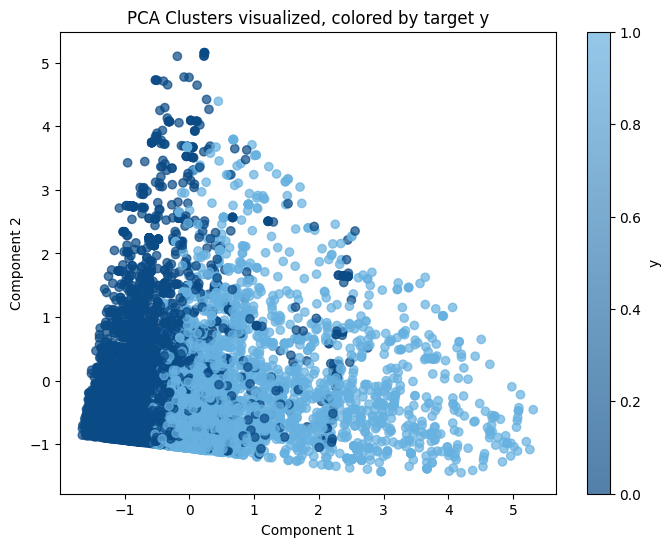

In [79]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

blue_gradient = LinearSegmentedColormap.from_list(
    "custom_blue", ["#0a4a85", "#67b1e0"]
)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap=blue_gradient, alpha=0.7)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Clusters visualized, colored by target y')
plt.colorbar(scatter, label='y')
plt.show()

In [82]:
from sklearn.manifold import TSNE

# t-SNE works best on scaled data
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X.select_dtypes(include=['number']))

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_2d = tsne.fit_transform(X_scaled)

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


KeyboardInterrupt: 

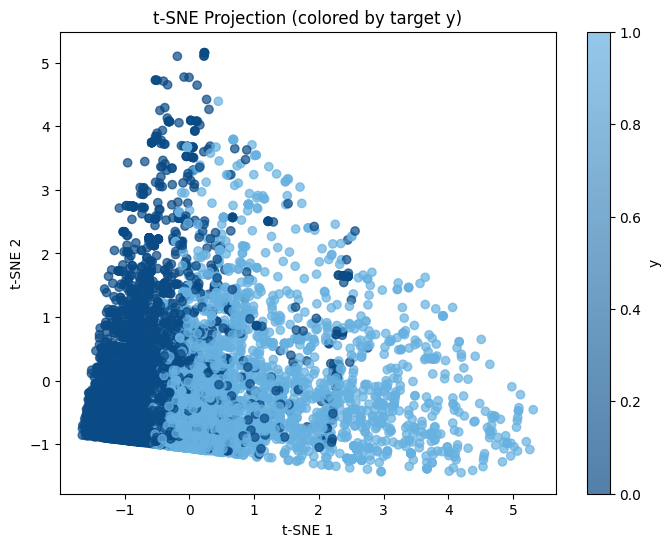

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap=blue_gradient, alpha=0.7)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Projection (colored by target y)')
plt.colorbar(scatter, label='y')
plt.show()

In [28]:
import umap
from sklearn.preprocessing import StandardScaler

# Scale features
X_scaled = StandardScaler().fit_transform(X.select_dtypes(include=['number']))

# UMAP projection
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)

/root/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-06-23 03:31:23.756622: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-23 03:31:23.896119: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-23 03:31:23.896252: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-23 03:31:23.898441: E external/l

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap=blue_gradient, alpha=0.7)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP Projection (colored by target y)')
plt.colorbar(scatter, label='y')
plt.show()

NameError: name 'X_umap' is not defined

<Figure size 800x600 with 0 Axes>

## Predicción de si se rinde o no

In [91]:
# Export df_sin_outliers to a CSV file
df_sin_outliers.to_csv('df_sin_outliers.csv', index=False)
print("✅ DataFrame 'df_sin_outliers' has been exported to 'df_sin_outliers.csv'")

✅ DataFrame 'df_sin_outliers' has been exported to 'df_sin_outliers.csv'


### Regresión Logística 

In [92]:
print(df_sin_outliers.columns.tolist())


['beneficiario', 'is_succesful', 'rinde_isapre', 'subtotal_isapre', 'tipo', 'total', 'usuario', 'isapre', 'duration']


In [93]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

df_sin_outliers['hubo_reembolso_isapre'] = (
    pd.to_numeric(df_sin_outliers['subtotal_isapre'], errors='coerce').fillna(0) > 0
)

df = df_sin_outliers.copy()

# --- 2. keep only allowed predictors ---
features = ['isapre', 'tipo', 'total']       # <- business constraint
X = df[features]
y = df['hubo_reembolso_isapre']

# --- 3. preprocessing ---
numeric_pipe = Pipeline([
    ('log', FunctionTransformer(np.log1p))  # mitigate skew
])

categorical_pipe = OneHotEncoder(handle_unknown='ignore', sparse=False)

preproc = ColumnTransformer([
    ('num', numeric_pipe, ['total']),
    ('cat', categorical_pipe, ['isapre', 'tipo'])
])




A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [94]:
import numpy as np
model = Pipeline([
    ('prep', preproc),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42)

model.fit(X_train, y_train)
y_pred  = model.predict(X_test)
y_proba = model.predict_proba(X_test)

In [95]:
X_train

,isapre,tipo,total
7742,Colmena,Proced. Ambulatorio,67000
3568,FONASA,Medicamentos,16990
5179,Vida Tres,Medicamentos,23070
8542,Cruz Blanca,Psicología,65000
3871,Vida Tres,Dental,129000
...,...,...,...
7450,Colmena,Dental,87800
553,Colmena,Hora Médica,40000
8510,Banmédica,Hora Médica,80000
4174,Banmédica,Medicamentos,4518


In [96]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Accuracy :", accuracy_score(y_test, y_pred))
print("F1       :", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))


Accuracy : 0.9430199430199431
F1       : 0.966301600673968
Precision: 0.9502899751449876
Recall   : 0.9828620394173093


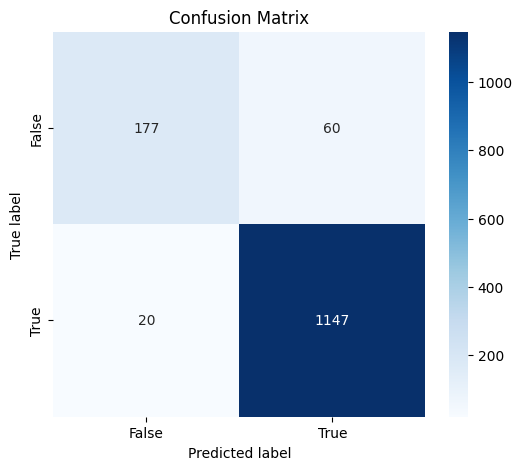

In [97]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


In [98]:
from sklearn.metrics import roc_auc_score

y_score = y_proba[:, 1]
print("ROC AUC Score:", roc_auc_score(y_test, y_score))


ROC AUC Score: 0.9015055372967578


In [99]:
# --- 1. craft a probe row -------------------------------------------------
probe = pd.DataFrame([{
    "isapre": "FONASA",          # <- string, exactly as it appears in X_train
    "tipo":   "Hora Médica",     # <- another category                               
    "total":  100_000              # <- integer CLP
}])

# --- 2. make sure the probe has the same columns / dtypes as X -----------
# If you used a preprocessing pipeline with OneHotEncoder this will "just work".
# If, instead, you already had dummy columns in X_train, convert `probe`
# with the same one-hot logic you used during training, or re-use the encoder:

# Example when you kept strings and used OneHotEncoder inside `preproc`
y_hat      = model.predict(probe)          # 0 / 1
y_hat_prob = model.predict_proba(probe)    # array([[p(no), p(yes)]])

print(f"P(reembolso)  = {y_hat_prob[0,1]:.3f}")
print(f"Class chosen  = {y_hat[0]}  (1 = habrá, 0 = no)")


P(reembolso)  = 0.073
Class chosen  = False  (1 = habrá, 0 = no)


In [100]:
import pickle
with open('linear_regressor.pkl', 'wb') as f:
    pickle.dump(model, f)

In [101]:
!pip freeze > requirements-frozen.txt

### Red Bayesiana

In [102]:
# clean + discretise
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer

# --- target flags ---------------------------------------------------
df = df_sin_outliers.copy()
df["hubo_reembolso_isapre"] = (df["subtotal_isapre"].fillna(0) > 0)

# --- keep mandatory predictors -------------------------------------
df["log_total"] = np.log1p(df["total"])

# --- discretise numeric cols into 4 equal-freq bins ----------------
df["amt_clp_orig"] = df["subtotal_isapre"]      # keep numeric target
df["dur_days_orig"] = df["duration"]

bin_cols = ["log_total", "subtotal_isapre", "duration"]
disc = KBinsDiscretizer(n_bins=4, encode="ordinal", strategy="quantile")
df[bin_cols] = disc.fit_transform(df[bin_cols]).astype(int)   # <- cast to int

# --- cast *every* column to string so pgmpy sees them as discrete ---
for col in ["isapre", "tipo", "hubo_reembolso_isapre", *bin_cols]:
    df[col] = df[col].astype(str)

bn_df = df[["isapre","tipo","log_total",
            "hubo_reembolso_isapre",
            "subtotal_isapre","duration"]]
train_df, test_df = train_test_split(
        bn_df, test_size=0.2, random_state=42,
        stratify=bn_df["hubo_reembolso_isapre"])


In [103]:
test_df

,isapre,tipo,log_total,hubo_reembolso_isapre,subtotal_isapre,duration
2780,Vida Tres,Psicología,2,True,1,1
6641,Colmena,Otro,2,True,2,0
8029,Colmena,Hora Médica,1,True,2,1
2425,Colmena,Terapia Ocupacional,3,True,3,2
5814,Cruz Blanca,Hora Médica,1,True,2,1
...,...,...,...,...,...,...
3477,Colmena,Otro,2,True,2,2
808,Colmena,Terapia Ocupacional,3,True,3,3
4943,Vida Tres,Psicología,2,True,1,0
2353,Cruz Blanca,Hora Médica,2,True,3,3


In [104]:
# define & fit the Bayesian Network
from pgmpy.models import DiscreteBayesianNetwork as DBN
from pgmpy.estimators import BayesianEstimator

edges = [
    ("isapre", "hubo_reembolso_isapre"),
    ("tipo",   "hubo_reembolso_isapre"),
    ("log_total", "hubo_reembolso_isapre"),

    ("hubo_reembolso_isapre", "subtotal_isapre"),
    ("log_total",             "subtotal_isapre"),

    ("hubo_reembolso_isapre", "duration"),
    ("log_total",             "duration"),
]

bn = DBN(edges)
bn.fit(train_df, estimator=BayesianEstimator,
       prior_type="BDeu", equivalent_sample_size=5)
bn.check_model()

ImportError: cannot import name 'MAP_LOCATION' from 'torch.serialization' (/root/venv/lib/python3.10/site-packages/torch/serialization.py)

In [107]:
# inference helper & quick sanity check
from pgmpy.inference import VariableElimination
ie = VariableElimination(bn)

# helpers to convert bin ↔ midpoint
edges_total   = disc.bin_edges_[0]
edges_amount  = disc.bin_edges_[1]
edges_dur     = disc.bin_edges_[2]

def midpoint(edges, idx):
    return (edges[idx] + edges[idx+1]) / 2

def predict_all(isapre, tipo, total_clp):
    lt = np.log1p(total_clp)
    log_total_bin = np.digitize(lt, edges_total[1:-1])          # 0..3

    evidence = {
        "isapre": str(isapre),
        "tipo":   str(tipo),
        "log_total": str(log_total_bin),
    }

    p_yes = ie.query(["hubo_reembolso_isapre"], evidence=evidence).values[1]

    amt_bin = ie.query(["subtotal_isapre"], evidence=evidence).values.argmax()
    est_amount = midpoint(edges_amount, amt_bin)        # ← no np.expm1 here ✔

    dur_bin = ie.query(["duration"], evidence=evidence).values.argmax()
    est_dur = midpoint(edges_dur, dur_bin)

    if p_yes == 0:
        est_amount, est_dur = 0.0, np.nan

    return float(p_yes), float(est_amount), float(est_dur)


from sklearn.metrics import roc_auc_score, mean_absolute_error

probs, y_true, amt_hat, amt_true, dur_hat, dur_true = [], [], [], [], [], []

for _, r in test_df.iterrows():
    p, m̂, d̂ = predict_all(r.isapre, r.tipo,
                            np.expm1(float(r.log_total)))  # back-transform
    probs.append(p)
    y_true.append(r.hubo_reembolso_isapre == "True")

    if r.hubo_reembolso_isapre == "True":
        amt_hat.append(m̂)
        amt_true.append(df.loc[_ , "amt_clp_orig"])
        dur_hat.append(d̂)
        dur_true.append(df.loc[_ , "dur_days_orig"])

print("ROC-AUC (approval):", round(roc_auc_score(y_true, probs), 3))
print("MAE CLP (amount) :", round(mean_absolute_error(amt_true, amt_hat)))
print("MAE days (duration):",
      round(mean_absolute_error(dur_true, dur_hat), 2))


ImportError: cannot import name 'MAP_LOCATION' from 'torch.serialization' (/root/venv/lib/python3.10/site-packages/torch/serialization.py)

In [110]:
# Isapre: ['Banmédica', 'Colmena', 'Consalud', 'Cruz Blanca', 'Esencial', 'FONASA', 'Isapre Fundación BancoEstado', 'Masvida', 'Vida Tres']
# Type: ['Dental', 'Examen / Imágenes', 'Fonoaudiología', 'Hora Médica', 'Kinesiología', 'Medicamentos', 'Otro', 'Proced. Ambulatorio', 'Proced. Hospitalización', 'Psicología', 'Terapia Ocupacional', 'Urgencia']"
# Example: Colmena, medicamento de $45 000 CLP
p, monto, dias = predict_all("Cruz Blanca", "Examen / Imágenes", 58_000)

print(f"Probabilidad de reembolso  : {p:.2%}")
print(f"Monto esperado (CLP)       : ${monto:,.0f}")
print(f"Días para aprobación (mean): {dias:.1f}")


NameError: name 'predict_all' is not defined

In [113]:
# helper_model.py
import numpy as np
from pgmpy.inference import VariableElimination

class ReembolsoBN:
    """
    Combines:
      • KBinsDiscretizer  → self.disc
      • DiscreteBayesianNetwork → self.bn
      • Inference engine  → self.ie
    Provides .predict_all(isapre, tipo, total_clp)
    """

    def __init__(self, disc, bn):
        self.disc = disc
        self.bn = bn
        self.ie = VariableElimination(bn)

    # ---- main API --------------------------------------------------
    def predict_all(isapre, tipo, total_clp):
        lt = np.log1p(total_clp)
        log_total_bin = np.digitize(lt, edges_total[1:-1])          # 0..3

        evidence = {
            "isapre": str(isapre),
            "tipo":   str(tipo),
            "log_total": str(log_total_bin),
        }

        p_yes = ie.query(["hubo_reembolso_isapre"], evidence=evidence).values[1]

        amt_bin = ie.query(["subtotal_isapre"], evidence=evidence).values.argmax()
        est_amount = midpoint(edges_amount, amt_bin)        # ← no np.expm1 here ✔

        dur_bin = ie.query(["duration"], evidence=evidence).values.argmax()
        est_dur = midpoint(edges_dur, dur_bin)

        if p_yes == 0:
            est_amount, est_dur = 0.0, np.nan

        return float(p_yes), float(est_amount), float(est_dur)
!pip install cloudpickle
import cloudpickle
with open('discrete_bayesian_network.pkl', 'wb') as f:
    cloudpickle.dump(ReembolsoBN, f)


ImportError: cannot import name 'MAP_LOCATION' from 'torch.serialization' (/root/venv/lib/python3.10/site-packages/torch/serialization.py)

In [50]:
def show_bin_edges(name, edges, to_clp=False):
    print(f"\n{name}")
    for i in range(len(edges)-1):
        lo, hi = edges[i], edges[i+1]
        if to_clp:                   # convert log(total+1) → CLP
            lo, hi = np.expm1(lo), np.expm1(hi)
        print(f"  bin {i}: [{lo:,.0f}  –  {hi:,.0f})")

show_bin_edges("log_total  →  total CLP", edges_total, to_clp=True)
show_bin_edges("subtotal_isapre CLP", edges_amount)
show_bin_edges("duration days", edges_dur)



log_total  →  total CLP
  bin 0: [0  –  43,000)
  bin 1: [43,000  –  60,000)
  bin 2: [60,000  –  90,000)
  bin 3: [90,000  –  441,842)

subtotal_isapre CLP
  bin 0: [0  –  6,440)
  bin 1: [6,440  –  18,060)
  bin 2: [18,060  –  34,575)
  bin 3: [34,575  –  133,224)

duration days
  bin 0: [0  –  7)
  bin 1: [7  –  14)
  bin 2: [14  –  27)
  bin 3: [27  –  120)


<img src="image-20250622-195115.png" width="" align="" />

### GMM

In [116]:
#Label + Numeric prep
# assumes df_sin_outliers already exists -------------------------------
df = df_sin_outliers.copy()

# label: approved ↔ subtotal_isapre > 0
df["hubo_reembolso_isapre"] = (df["subtotal_isapre"].fillna(0) > 0).astype(int)

# numeric feature for the GMM
df["total_log"] = np.log1p(df["total"])


In [117]:
#train - test split
from sklearn.model_selection import train_test_split

features = ["isapre", "tipo", "total_log"]          # total_log is the only numeric
target   = "hubo_reembolso_isapre"

train_idx, test_idx = train_test_split(
    df.index, test_size=0.3, stratify=df[target], random_state=42
)

df_train, df_test = df.loc[train_idx], df.loc[test_idx]


In [118]:
# fit a pair of GMMs per (isapre, tipo)
from sklearn.mixture import GaussianMixture
from collections import defaultdict

group_models = {}        # (isapre, tipo) → dict with pos/neg GMMs and priors
global_models = {}       # backup if a group is unseen

def fit_gmm(X, n_components=2):
    """Return a trained GMM; fall back to 1 component for tiny samples."""
    n_comp = 1 if len(X) < 20 else n_components
    return GaussianMixture(n_components=n_comp, covariance_type="full",
                           random_state=0).fit(X)

# --- iterate over groups ------------------------------------------------
for (isp, typ), gdf in df_train.groupby(["isapre", "tipo"]):
    X_pos = gdf.loc[gdf[target] == 1, ["total_log"]].values
    X_neg = gdf.loc[gdf[target] == 0, ["total_log"]].values
    if len(X_pos) < 5 or len(X_neg) < 5:          # too small → skip, use global
        continue
    gmm_pos = fit_gmm(X_pos)
    gmm_neg = fit_gmm(X_neg)
    pi_pos  = len(X_pos) / len(gdf)
    group_models[(isp, typ)] = {
        "pos": gmm_pos, "neg": gmm_neg, "pi": pi_pos
    }

# --- optional global fallback ------------------------------------------
X_pos_glob = df_train.loc[df_train[target] == 1, ["total_log"]].values
X_neg_glob = df_train.loc[df_train[target] == 0, ["total_log"]].values
global_models = {
    "pos": fit_gmm(X_pos_glob),
    "neg": fit_gmm(X_neg_glob),
    "pi":  len(X_pos_glob) / len(df_train)
}


In [119]:
#Probability & Class prediction helpers
def row_proba(row):
    """Return P(approved | row) using the group’s GMMs or global fallback."""
    key = (row["isapre"], row["tipo"])
    mdl = group_models.get(key, global_models)

    x = row[["total_log"]].values.reshape(1, -1)
    log_p_pos = mdl["pos"].score_samples(x)[0] + np.log(mdl["pi"])
    log_p_neg = mdl["neg"].score_samples(x)[0] + np.log(1 - mdl["pi"])
    return np.exp(log_p_pos - np.logaddexp(log_p_pos, log_p_neg))

def predict(df_slice, thresh=0.5):
    proba = df_slice.apply(row_proba, axis=1)
    return (proba >= thresh).astype(int), proba


In [120]:
# Evaluate on the held-out test set
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    roc_auc_score, confusion_matrix
)

y_hat, y_prob = predict(df_test)
y_true = df_test[target].values

print("Accuracy :", accuracy_score(y_true, y_hat))
print("F1        :", f1_score(y_true, y_hat))
print("Precision :", precision_score(y_true, y_hat))
print("Recall    :", recall_score(y_true, y_hat))
print("ROC-AUC   :", roc_auc_score(y_true, y_prob))


Accuracy : 0.845679012345679
F1        : 0.9126578876646063
Precision : 0.8614916286149162
Recall    : 0.9702857142857143
ROC-AUC   : 0.7696974317817016


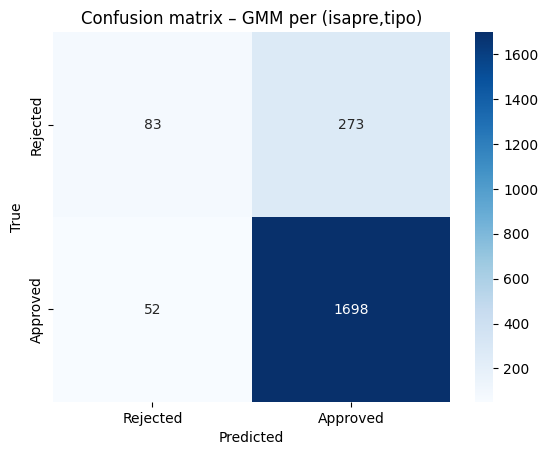

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_hat)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Rejected","Approved"],
            yticklabels=["Rejected","Approved"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix – GMM per (isapre,tipo)")
plt.show()


In [122]:
custom = {
    "isapre": "FONASA",
    "tipo":   "Medicamentos",
    "total":  60_000,
}
custom["total_log"] = np.log1p(custom["total"])
row = pd.Series(custom)
p = row_proba(row)
print("\nCustom claim:")
print(row[["isapre", "tipo", "total"]])
print(f"Model P(approved) = {p:.3%}")



Custom claim:
isapre          FONASA
tipo      Medicamentos
total            60000
dtype: object
Model P(approved) = 89.661%


In [123]:
with open('gmm.pkl', 'wb') as f:
    cloudpickle.dump(row_proba, f)

NameError: name 'cloudpickle' is not defined

# Causalidad

tipo_Examen / Imágenes: ATE normalizado = 0.4547, ATE en CLP = $9,087
tipo_Fonoaudiología: ATE normalizado = 0.0018, ATE en CLP = $674
tipo_Hora Médica: ATE normalizado = 0.3247, ATE en CLP = $6,957
tipo_Kinesiología: ATE normalizado = -0.0598, ATE en CLP = $-579
tipo_Medicamentos: ATE normalizado = -1.2675, ATE en CLP = $-24,595
tipo_Otro: ATE normalizado = -0.0206, ATE en CLP = $317
tipo_Proced. Ambulatorio: ATE normalizado = 0.1374, ATE en CLP = $3,508
tipo_Proced. Hospitalización: ATE normalizado = 0.5826, ATE en CLP = $15,577
tipo_Psicología: ATE normalizado = -0.0160, ATE en CLP = $-233
tipo_Terapia Ocupacional: ATE normalizado = 0.1026, ATE en CLP = $1,647
tipo_Urgencia: ATE normalizado = -0.1246, ATE en CLP = $-1,168
isapre_Colmena: ATE normalizado = 0.0947, ATE en CLP = $2,159
isapre_Consalud: ATE normalizado = -0.1064, ATE en CLP = $-2,011
isapre_Cruz Blanca: ATE normalizado = -0.0639, ATE en CLP = $-1,617
isapre_Esencial: ATE normalizado = 0.1156, ATE en CLP = $2,574
isapre_

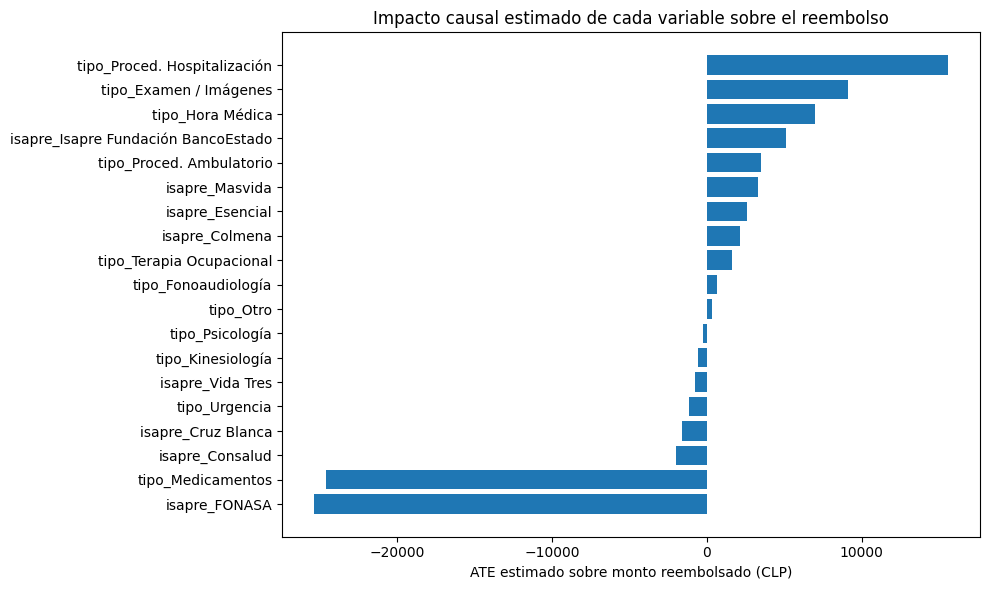

In [126]:
from econml.dr import DRLearner
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

results = []

# Asegura que df_sin_outliers y df_solo_isapre_encoded tengan el mismo largo
assert len(df_sin_outliers) == len(df_solo_isapre_encoded), "Los DataFrames no están sincronizados"

# Desviación estándar original (no usada directamente pero útil para interpretar)
std_subtotal = df_sin_outliers["subtotal_isapre"].std()

# Columnas candidatas a tratamiento (binarias)
binary_treatment_candidates = [
    col for col in df_solo_isapre_encoded.columns
    if col.startswith("tipo_") or col.startswith("isapre_")
]

# Iterar sobre tratamientos
for treatment_col in binary_treatment_candidates:
    if df_solo_isapre_encoded[treatment_col].nunique() == 2:
        T = df_solo_isapre_encoded[treatment_col].astype(int)
        Y_scaled = df_solo_isapre_encoded["subtotal_isapre"]
        Y_raw = df_sin_outliers["subtotal_isapre"]

        # Variables explicativas (sin target ni tratamiento actual)
        X_target = df_solo_isapre_encoded.drop(columns=[
            treatment_col, "subtotal_isapre", "is_succesful", "rinde_isapre", "duration"
        ])
        X_target = X_target.select_dtypes(include=["number"])

        # Separar conjuntos (usamos la misma semilla para mantener consistencia)
        X_train, X_test, T_train, T_test, Y_train_scaled, Y_test_scaled = train_test_split(
        X_target, T, Y_scaled, test_size=0.2, random_state=42)

        # Y_raw separado igual, pero sin incluir X ni T
        Y_train_raw, Y_test_raw = train_test_split(
            Y_raw, test_size=0.2, random_state=42
        )

        # Modelo DRLearner
        dr = DRLearner(
            model_regression=RandomForestRegressor(),
            model_propensity=LogisticRegression(max_iter=1000)
        )

        # ATE normalizado
        dr.fit(Y_train_scaled, T_train, X=X_train)
        ate_scaled = dr.effect(X_test).mean()

        # ATE sin normalizar (en CLP)
        dr.fit(Y_train_raw, T_train, X=X_train)
        ate_raw = dr.effect(X_test).mean()

        print(f"{treatment_col}: ATE normalizado = {ate_scaled:.4f}, ATE en CLP = ${ate_raw:,.0f}")

        results.append({
            "tratamiento": treatment_col,
            "ATE (normalizado)": ate_scaled,
            "ATE real (CLP)": ate_raw
        })

# Crear DataFrame y graficar
results_df = pd.DataFrame(results).sort_values(by="ATE real (CLP)", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(results_df["tratamiento"], results_df["ATE real (CLP)"])
plt.xlabel("ATE estimado sobre monto reembolsado (CLP)")
plt.title("Impacto causal estimado de cada variable sobre el reembolso")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

tipo_Examen / Imágenes: ATE sobre duración = 4.59 días
tipo_Fonoaudiología: ATE sobre duración = 6.41 días
tipo_Hora Médica: ATE sobre duración = -1.87 días
tipo_Kinesiología: ATE sobre duración = 5.06 días
tipo_Medicamentos: ATE sobre duración = -3.80 días
tipo_Otro: ATE sobre duración = 2.96 días
tipo_Proced. Ambulatorio: ATE sobre duración = 5.82 días
tipo_Proced. Hospitalización: ATE sobre duración = 2.71 días
tipo_Psicología: ATE sobre duración = -4.36 días
tipo_Terapia Ocupacional: ATE sobre duración = 12.00 días
tipo_Urgencia: ATE sobre duración = 0.91 días
isapre_Colmena: ATE sobre duración = -2.17 días
isapre_Consalud: ATE sobre duración = -3.27 días
isapre_Cruz Blanca: ATE sobre duración = 2.40 días
isapre_Esencial: ATE sobre duración = -2.50 días
isapre_FONASA: ATE sobre duración = -1.90 días
isapre_Isapre Fundación BancoEstado: ATE sobre duración = -2.57 días
isapre_Masvida: ATE sobre duración = 5.24 días
isapre_Vida Tres: ATE sobre duración = -2.26 días


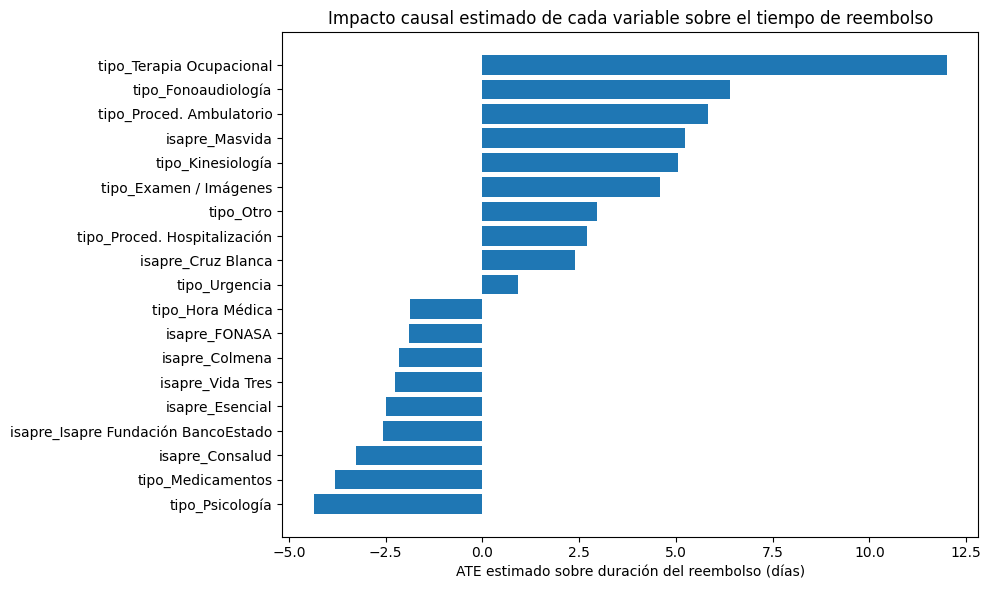

In [127]:
from econml.dr import DRLearner
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

results_duration = []

# Asegura que los DataFrames estén sincronizados
assert len(df_sin_outliers) == len(df_solo_isapre_encoded), "Los DataFrames no están sincronizados"

# Columnas candidatas a tratamiento (binarias)
binary_treatment_candidates = [
    col for col in df_solo_isapre_encoded.columns
    if col.startswith("tipo_") or col.startswith("isapre_")
]

# Iterar sobre tratamientos binarios
for treatment_col in binary_treatment_candidates:
    if df_solo_isapre_encoded[treatment_col].nunique() == 2:
        T = df_solo_isapre_encoded[treatment_col].astype(int)
        Y = df_sin_outliers["duration"]

        # Variables explicativas (excluyendo target y tratamiento actual)
        X_target = df_solo_isapre_encoded.drop(columns=[
            treatment_col, "subtotal_isapre", "is_succesful", "rinde_isapre", "duration"
        ])
        X_target = X_target.select_dtypes(include=["number"])

        # Separar en entrenamiento y prueba
        X_train, X_test, T_train, T_test, Y_train, Y_test = train_test_split(
            X_target, T, Y, test_size=0.2, random_state=42
        )

        # Modelo DRLearner
        dr = DRLearner(
            model_regression=RandomForestRegressor(),
            model_propensity=LogisticRegression(max_iter=1000)
        )

        # Entrenar y estimar ATE
        dr.fit(Y_train, T_train, X=X_train)
        ate_duration = dr.effect(X_test).mean()

        print(f"{treatment_col}: ATE sobre duración = {ate_duration:.2f} días")

        results_duration.append({
            "tratamiento": treatment_col,
            "ATE duración (días)": ate_duration
        })

# Graficar resultados
df_dur = pd.DataFrame(results_duration).sort_values(by="ATE duración (días)", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(df_dur["tratamiento"], df_dur["ATE duración (días)"])
plt.xlabel("ATE estimado sobre duración del reembolso (días)")
plt.title("Impacto causal estimado de cada variable sobre el tiempo de reembolso")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [4]:
!pip install econml

  Using cached econml-0.15.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.5 MB)

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e34e34c6-c715-4731-aaee-e396c0a78648' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>